Support Vector Machines
Using: Iris Dataset: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

In [2]:
# Load the iris dataset (for simplicity)
# sepal - Чашолисток (2)
# petal - Пелюстка (3)
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
X[:10] # чашолисток довжина та ширина

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [4]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

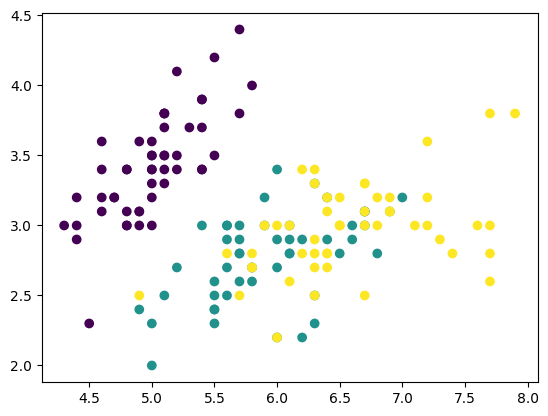

In [5]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

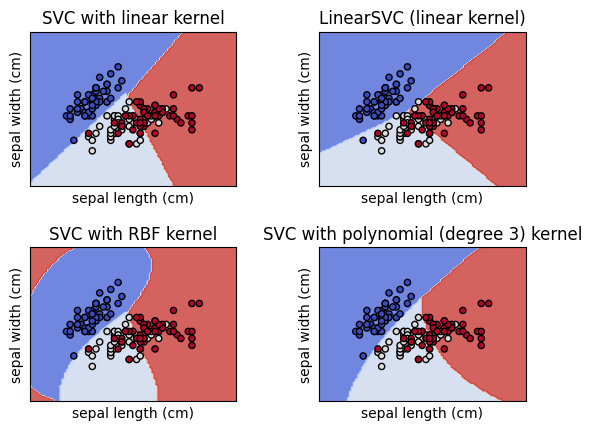

In [6]:
# https://scikit-learn.org/stable/auto-examples/svm/plot_iris.html
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

X= iris.data[:, :2]  # we only take the first two features.
y = iris.target

# we create an instance of SVM and fit out data. We don't scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual = 'auto'),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree=3, C=C)
)

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp= DecisionBoundaryDisplay.from_estimator(
        clf, X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Simple example

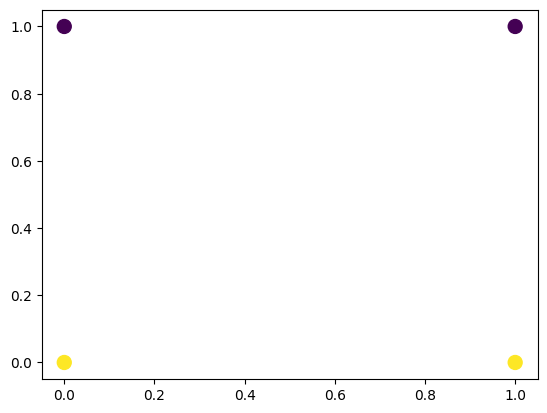

In [7]:
X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
])
y = np.array([0, 1, 1, 0])
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1, cmap='viridis')

In [8]:
model = SVC(kernel='linear')
model.fit(X, y)
model.decision_function(X)

array([-1.,  1.,  1., -1.])

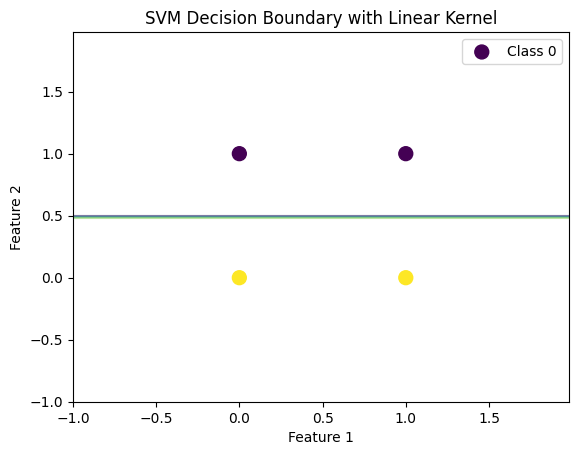

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
])
y = np.array([0, 1, 1, 0])

#Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1, cmap='viridis')

# Create a meshgrid to generate points for the countour plot
################################
h = .02  # step size in the mesh
#################################

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X, y)

# Obtain decision function values for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary and margins
plt.contour(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.legend(labels=['Class 0', 'Class 1'])
#Show the plot
plt.show()

In [10]:
xx

array([[-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       ...,
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98]], shape=(150, 150))

In [11]:
np.c_[xx.ravel(), yy.ravel()]

array([[-1.  , -1.  ],
       [-0.98, -1.  ],
       [-0.96, -1.  ],
       ...,
       [ 1.94,  1.98],
       [ 1.96,  1.98],
       [ 1.98,  1.98]], shape=(22500, 2))

In [12]:
model.support_ # indexes of the support vectors

array([0, 3, 1, 2], dtype=int32)

In [13]:
model.support_vectors_ # support vectors
# Support vectors are the elements of the training set that would change the position of the dividing hyperplane if they were removed.

array([[1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [14]:
model.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'linear',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': False,
 'n_features_in_': 2,
 'class_weight_': array([1., 1.]),
 'classes_': array([0, 1]),
 '_gamma': np.float64(2.0),
 'support_': array([0, 3, 1, 2], dtype=int32),
 'support_vectors_': array([[1., 1.],
        [0., 1.],
        [0., 0.],
        [1., 0.]]),
 '_n_support': array([2, 2], dtype=int32),
 'dual_coef_': array([[-1., -1.,  1.,  1.]]),
 'intercept_': array([1.]),
 '_probA': array([], dtype=float64),
 '_probB': array([], dtype=float64),
 'fit_status_': 0,
 '_num_iter': array([2], dtype=int32),
 'shape_fit_': (4, 2),
 '_intercept_': array([-1.]),
 '_dual_coef_': array([[ 1.,  1., -1., -1.]]),
 'n_iter_': array([2], dtype=int32)}

In [15]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy

1.0

# With more data

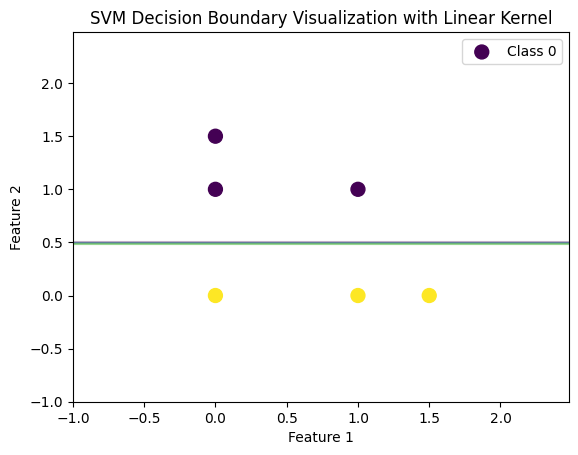

In [16]:
X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
    [1.5, 0],
    [0, 1.5],
])
y = np.array([0, 1, 1, 0, 1, 0])
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1, cmap='viridis')

# Create a meshgrid to generate points for the contour plot
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X, y)

# Obtain decision function values for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary as a countour plot
plt.contour(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary Visualization with Linear Kernel')
plt.legend(labels=['Class 0', 'Class 1'])
# Show the plot
plt.show()

In [17]:
model.support_

array([0, 3, 1, 2], dtype=int32)

In [18]:
model.support_vectors_  

array([[1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [19]:
model.decision_function(X), model.predict(X)
# And that's easy to interpret:
# The decision_function tells us on which side of the hyperplane generated by the classifier we are
# and how far we are from it.
# Based on that information, the estimator then labels the examples with the correspoinding label.

(array([-1.,  1.,  1., -1.,  1., -2.]), array([0, 1, 1, 0, 1, 0]))

In [20]:
y_pred = model.predict(X)
accuracy = accuracy_score(y_pred, y)
print(accuracy, y_pred)

1.0 [0 1 1 0 1 0]


# IRIS

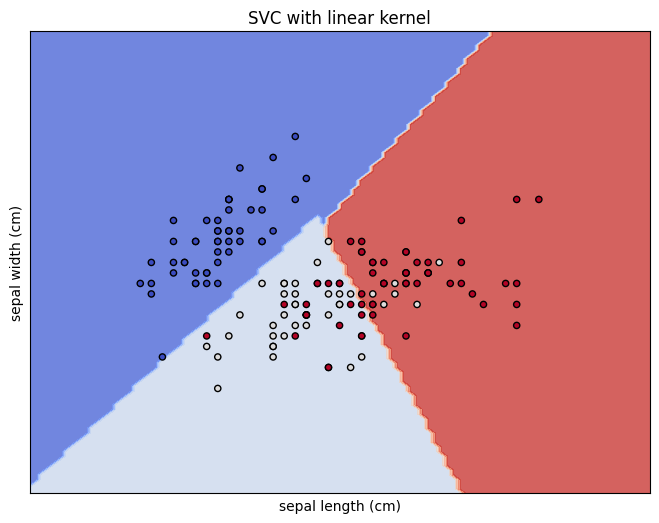

In [21]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# we create an instance of SVM and fit out data. We don't scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel='linear', C=C)
model.fit(X, y)

# title for the plots
title = "SVC with linear kernel"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model, X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [22]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.82

# Kernel Trick
### Radial Basis Function Kernel  


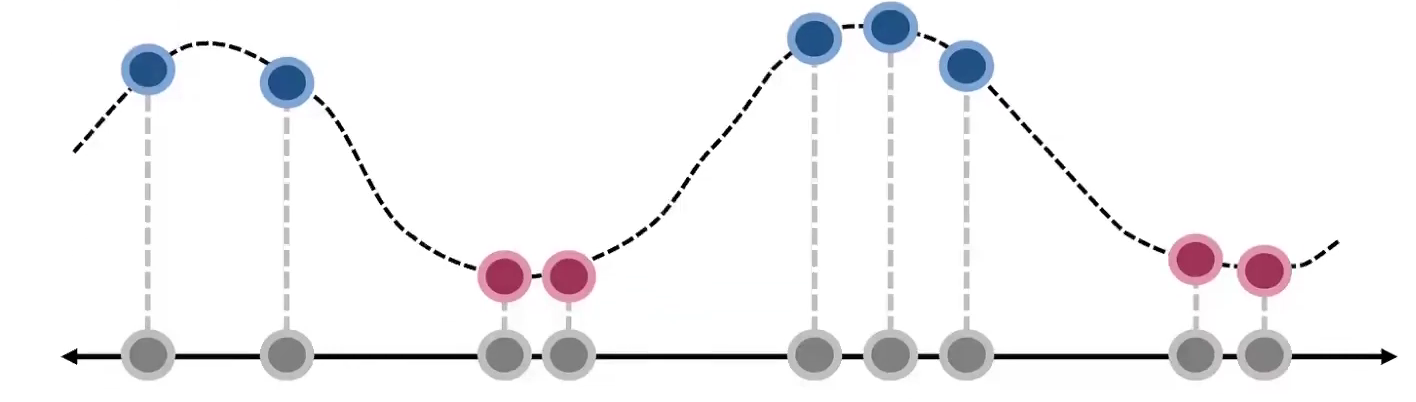

The kernel function is just a mathematical function that converts a low-dimensional input space into a higher-dimensional space. This is done by mapping the data into a new feature space. In this space, the data will be linearly separable. This means that a support vector machine can be used to find a hyperplane that separates the data.

**Sources of the examples below:**  
- https://rstudio-pubs-static.s3.amazonaws.com/754361_059611f87b0b4c9881adb7c8ef0ace7e.html  
- https://www.pycodemates.com/2022/10/the-rbf-kernel-in-svm-complete-guide.html  




## (Simple) Example 1

In [23]:
X = np.array([
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
])

y = np.array([0, 0, 1, 1])

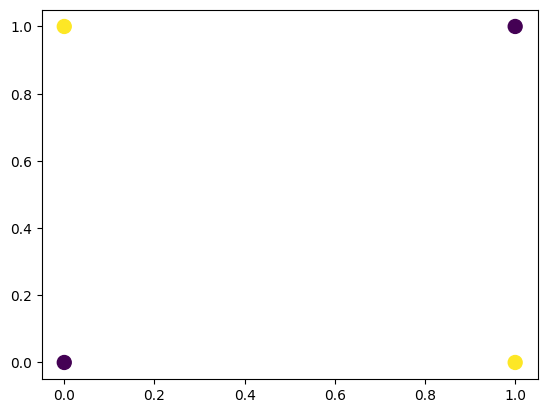

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)

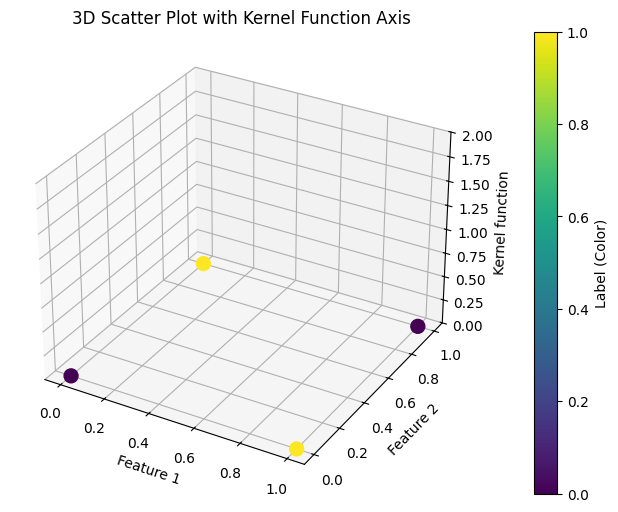

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on labels y
scatter = ax.scatter(X[:, 0], X[:, 1], np.array([0, 0, 0, 0]), c=y, s=100, alpha=1, cmap='viridis')
ax.set_zlim(0, max(y)+1)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Kernel function')
ax.set_title('3D Scatter Plot with Kernel Function Axis')

# Add color bar to the right
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Label (Color)')

plt.show()


# Radial Basis Function (RBF) kernel

$$K(X_1, X_2) = \exp(-\gamma \|X_1 - X_2\|^2)$$

## Hyperparameters:

- **Gamma**: Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

Kernels generalize the notion of ‘inner product similarity’.

In [26]:
# Radial Basis Function (RBF) kernel calculation
# https://scikit-learn.org/stable/auto-examples/svm/plot_rbf_parameters.html 
def rbf_kernel(X1, X2, gamma=1.0):
    dist_squared = np.sum((X1[:, np.newaxis] - X2)**2, axis=-1)
    return np.exp(-gamma * dist_squared)

# Calculate RBF kernel values
gamma = (1/(X.shape[1]*X.var()))
rbf_kernel_values = rbf_kernel(X, X, gamma=gamma)
rbf_kernel_values # pairwise RBF kernel values between samples

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [27]:
X.shape[1]

2

In [28]:
X[:, np.newaxis]

array([[[1, 1]],

       [[0, 0]],

       [[1, 0]],

       [[0, 1]]])

In [29]:
X[:, np.newaxis]-X

array([[[ 0,  0],
        [ 1,  1],
        [ 0,  1],
        [ 1,  0]],

       [[-1, -1],
        [ 0,  0],
        [-1,  0],
        [ 0, -1]],

       [[ 0, -1],
        [ 1,  0],
        [ 0,  0],
        [ 1, -1]],

       [[-1,  0],
        [ 0,  1],
        [-1,  1],
        [ 0,  0]]])

In [30]:
for i in X[:, np.newaxis]:
    for j in range(len(X)):
        print(i[0], '-', X[j], '=', (i - X[j])[0]) 
    print("")

[1 1] - [1 1] = [0 0]
[1 1] - [0 0] = [1 1]
[1 1] - [1 0] = [0 1]
[1 1] - [0 1] = [1 0]

[0 0] - [1 1] = [-1 -1]
[0 0] - [0 0] = [0 0]
[0 0] - [1 0] = [-1  0]
[0 0] - [0 1] = [ 0 -1]

[1 0] - [1 1] = [ 0 -1]
[1 0] - [0 0] = [1 0]
[1 0] - [1 0] = [0 0]
[1 0] - [0 1] = [ 1 -1]

[0 1] - [1 1] = [-1  0]
[0 1] - [0 0] = [0 1]
[0 1] - [1 0] = [-1  1]
[0 1] - [0 1] = [0 0]



In [31]:
(X[:, np.newaxis] - X) ** 2

array([[[0, 0],
        [1, 1],
        [0, 1],
        [1, 0]],

       [[1, 1],
        [0, 0],
        [1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0],
        [0, 0],
        [1, 1]],

       [[1, 0],
        [0, 1],
        [1, 1],
        [0, 0]]])

In [32]:
#arr = (X[:, np.newaxis] - X) ** 2
#arr[0][1][0]=5
#arr

In [33]:
np.sum((X[:, np.newaxis] - X)**2, axis=-1)

array([[0, 2, 1, 1],
       [2, 0, 1, 1],
       [1, 1, 0, 2],
       [1, 1, 2, 0]])

In [34]:
# Equivalent to 
np.sum((X[:, np.newaxis] - X)**2, axis=2)

array([[0, 2, 1, 1],
       [2, 0, 1, 1],
       [1, 1, 0, 2],
       [1, 1, 2, 0]])

In [35]:
# Equivalent to 
arr = (X[:, np.newaxis] - X) ** 2
for i in arr:
    for j in i:
        print(j, ":", "+", j[1], "=", j[0] + j[1])
    print("")

[0 0] : + 0 = 0
[1 1] : + 1 = 2
[0 1] : + 1 = 1
[1 0] : + 0 = 1

[1 1] : + 1 = 2
[0 0] : + 0 = 0
[1 0] : + 0 = 1
[0 1] : + 1 = 1

[0 1] : + 1 = 1
[1 0] : + 0 = 1
[0 0] : + 0 = 0
[1 1] : + 1 = 2

[1 0] : + 0 = 1
[0 1] : + 1 = 1
[1 1] : + 1 = 2
[0 0] : + 0 = 0



In [36]:
-gamma * np.sum((X[:, np.newaxis] - X)**2, axis=-1)

array([[-0., -4., -2., -2.],
       [-4., -0., -2., -2.],
       [-2., -2., -0., -4.],
       [-2., -2., -4., -0.]])

In [37]:
np.exp(-gamma * np.sum((X[:, np.newaxis] - X)**2, axis=-1))

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [38]:
import math
math.e**-0

1.0

In [39]:
rbf_kernel_values

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [40]:
# Built in function in sklearn
from sklearn.metrics.pairwise import rbf_kernel
kernel_values = rbf_kernel(X, Y=None, gamma=gamma)
kernel_values

array([[1.        , 0.01831564, 0.13533528, 0.13533528],
       [0.01831564, 1.        , 0.13533528, 0.13533528],
       [0.13533528, 0.13533528, 1.        , 0.01831564],
       [0.13533528, 0.13533528, 0.01831564, 1.        ]])

In [41]:
X, kernel_values # true features (X) and "fake" features (RBF kernel values)

(array([[1, 1],
        [0, 0],
        [1, 0],
        [0, 1]]),
 array([[1.        , 0.01831564, 0.13533528, 0.13533528],
        [0.01831564, 1.        , 0.13533528, 0.13533528],
        [0.13533528, 0.13533528, 1.        , 0.01831564],
        [0.13533528, 0.13533528, 0.01831564, 1.        ]]))

## Using support vectors to predict decision boundary
More info: https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

When applying kernel trick, decision boundary is calculated with the help of Kernel features (Instead of original X features)

In [42]:
# previously
# model = SVC(kernel='linear')
# model.fit(X, y)

# now
X_ = rbf_kernel(X, Y=None, gamma=gamma)
m_precomputed = SVC(kernel='precomputed')
m_precomputed.fit(X_, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'precomputed'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


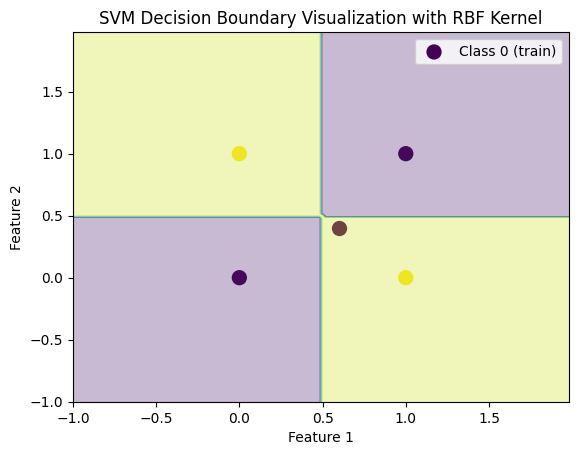

In [43]:
# At prediction time, kernel values are computed for the inputs first
X_test = np.array([[0.6, 0.4]])
# Ensure X_test is 2D (n_samples, n_features)
if X_test.ndim == 1:
    X_test = X_test.reshape(1, -1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  np.arange(y_min, y_max, h))

# Obtain predictions for test data
# Step 1: pick the support vectors
support_vectors = X
# Step 2: use the support vectors to calculate kernel values for the test data
kernel_test = rbf_kernel(X_test, Y=support_vectors, gamma=gamma) # support vectors!
# Step 3: use the model previously trained on train data and predict outputs for y based on teh kernel values for the test data
y_pred = m_precomputed.predict(kernel_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=100, alpha=1)

# Obtain decision boundary values for each point in the meshgrid (same process as for the test data)
kernel_grid = rbf_kernel(np.c_[xx.ravel(), yy.ravel()], Y=support_vectors, gamma=gamma) # support vectors!
Z = m_precomputed.predict(kernel_grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary Visualization with RBF Kernel')
plt.legend(labels=['Class 0 (train)'])
# Show the plot
plt.show()

In [44]:
y_pred

array([1])

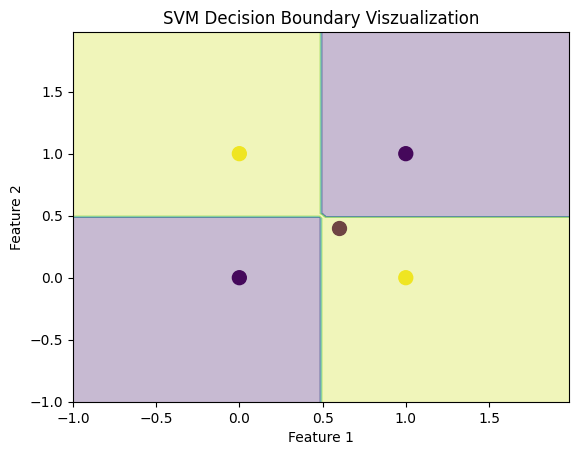

In [45]:
# With sklearn analogously
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=1)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train an SVM model
model = SVC(kernel="rbf") # Select the right kernel and train the sklearn
model.fit(X, y) 

y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=100, alpha=1)

# Obtain decision boundary values for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap='viridis', alpha = 0.3)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel("Feature 2")
plt.title('SVM Decision Boundary Viszualization')

# Show the plot
plt.show()

In [46]:
y_pred =  model.predict(X)
accuracy_score(y_pred, y)

1.0

In [47]:
support_vectors = model.support_vectors_
dual_coeficients = model.dual_coef_
support_vectors, dual_coeficients

(array([[1., 1.],
        [0., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[-1., -1.,  1.,  1.]]))

# Multi-class classification
IRIS data

In [48]:
from sklearn.multiclass import OneVsRestClassifier

X=iris.data[:, :2]  # we only take the first two features.
y = iris.target
# define model
model = SVC()
# define strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)

# make a prediction for a new sample
yhat = ovr.predict(X)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [49]:
ovr.__dict__

{'estimator': SVC(),
 'n_jobs': None,
 'verbose': 0,
 'label_binarizer_': LabelBinarizer(sparse_output=True),
 'classes_': array([0, 1, 2]),
 'estimators_': [SVC(), SVC(), SVC()],
 'n_features_in_': 2}

In [50]:
ovr.__dict__['estimators_'][0].__dict__["classes_"]
# 0 vs. 1 or 2
# 1 vs. 2 or 1
# 0 vs. 2 or 1


array([0, 1])

In [51]:
from sklearn.multiclass import OneVsRestClassifier

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
# define model
model = SVC()
# define strategy
ovo = OneVsRestClassifier(model)
# fit model
ovo.fit(X, y)
# make a prediction for a new sample
yhat = ovo.predict(X)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [52]:
ovr.__dict__['estimators_'][0].__dict__["classes_"]
# 0 vs. 1 or 2
# 1 vs. 2 or 1
# 0 vs. 2 or 1

array([0, 1])

In [53]:
model = SVC(decision_function_shape='ovr')
model

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


# Iris data (RBF kernel)

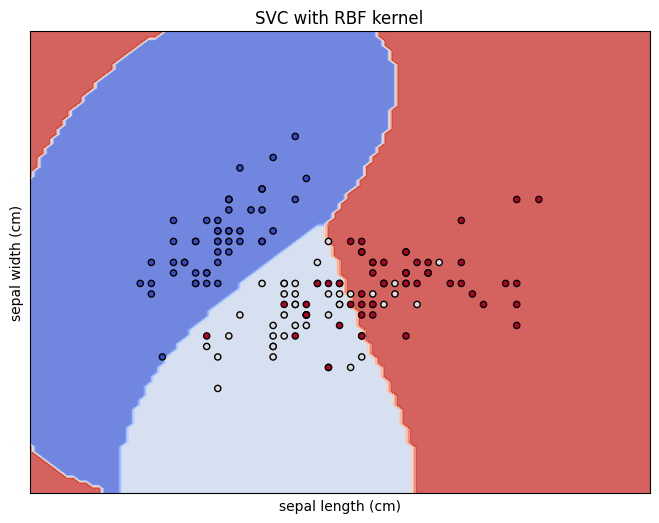

In [55]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# we create an instance of SVM and fit out data. We don't scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
model.fit(X, y)

# title for the plots
title = "SVC with RBF kernel"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [56]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.8266666666666667

# Other kernel functions

| No | Kernel function | Formula | Optimization parameter |
|---|---|---|---|
| 1 | Dot-product | $$K(x_n, x_i) = (x_n, x_i)$$ | C |
| 2 | RBF | $$K(x_n, x_i) = \exp\left(-\gamma \| x_n - x_i \|^2 + C\right)$$ | C and γ |
| 3 | Sigmoid | $$K(x_n, x_i) = \tanh\left(\gamma (x_n, x_i) + r\right)$$ | C, γ, and r  |
| 4 | Polynomial | $$K(x_n, x_i) = \left(\gamma (x_n, x_i) + r\right)^d$$ | C, γ, r, and d  |

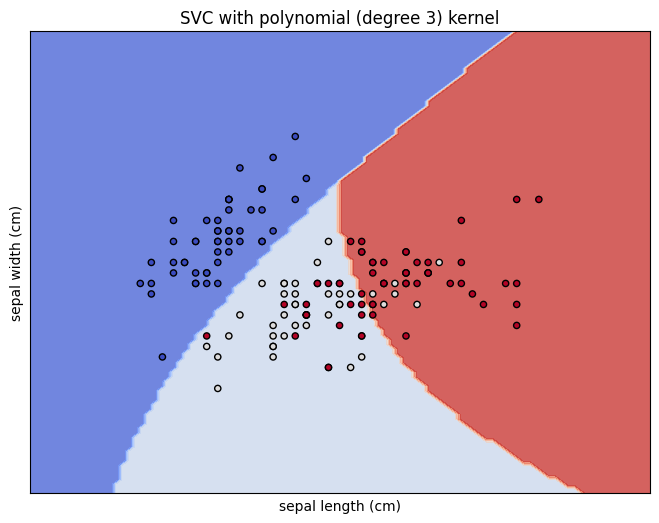

In [57]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# we create an instance of SVM and fit out data. We don't scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel='poly', degree=3, C=C)
model.fit(X, y)

# title for the plots
title = "SVC with polynomial (degree 3) kernel"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X0, X1 = X[:, 0], X[:, 1]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [58]:
y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.8133333333333334

# With all features

Text(0, 0.5, 'Petal width (cm)')

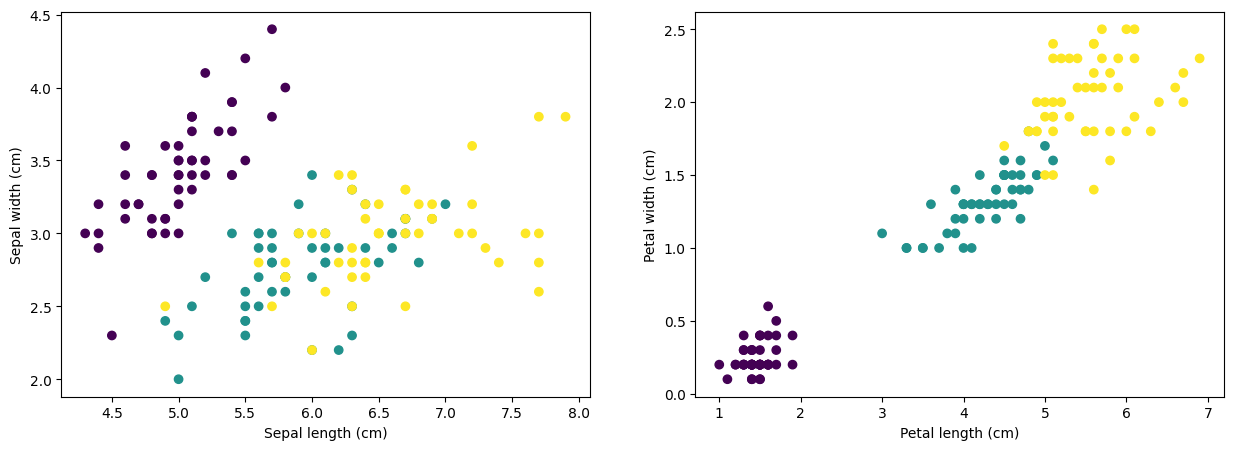

In [59]:
X = iris.data[:, :4]
y = iris.target

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")


plt.subplot(1,2,2)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")


In [60]:
# we create an instance of SVM and fit out data. 
X = iris.data[:, :4]
y = iris.target

C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
model.fit(X, y)

y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.98

See different kernel functions and different results: https://www.kaggle.com/code/joparga3/3-visualising-how-different-kernels-in-svms-work

# Loss function
See: https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d
or https://medium.com/data-science/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d

In [61]:
# Hinge Loss
from sklearn.metrics import hinge_loss
pred_decision = model.decision_function(X)
pred_decision[:10]

array([[ 2.23617716, -0.18869735,  0.82343601],
       [ 2.23397202, -0.18479552,  0.82459498],
       [ 2.235662  , -0.18807698,  0.82404688],
       [ 2.2338362 , -0.18484969,  0.82499993],
       [ 2.23659375, -0.18946571,  0.8232544 ],
       [ 2.22976166, -0.18133663,  0.83124702],
       [ 2.2328674 , -0.18512495,  0.82779154],
       [ 2.23582054, -0.18758599,  0.82306633],
       [ 2.230575  , -0.18205476,  0.83003201],
       [ 2.23329101, -0.18431997,  0.82577661]])

In [62]:
hinge_loss(y, pred_decision)

0.0408985907907714

# Hyperparameter Optimization

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import scipy.stats as stats
from scipy.stats import randint as sp_randint



In [64]:
# Default parameters
svk = SVC()
params = svk.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.transpose()

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [65]:
X = iris.data[:, :4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [67]:
from sklearn import svm

# Cross validation grid search (best parameters)
c_range = np.logspace(-0, 4, 8)
gamma_range = np.logspace(-4, 0, 8)
tuned_parameters = [
    {
        'kernel': ['rbf'],
        'gamma': gamma_range,
        'C': c_range
    }
]

svc = svm.SVC()
clf = GridSearchCV(
    svc,
    param_grid=tuned_parameters,
    scoring='explained_variance',
    cv=4,
    #n_jobs=-4,
    verbose=20
)

clf.fit(X_train, y_train)

print('Best score for data: ', clf.best_score_)
print('Best C:', clf.best_estimator_.C)
print('Best gamma:', clf.best_estimator_.gamma)
print('Best kernel:', clf.best_estimator_.kernel)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
[CV 1/4; 1/64] START C=1.0, gamma=0.0001, kernel=rbf............................
[CV 1/4; 1/64] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/4; 1/64] START C=1.0, gamma=0.0001, kernel=rbf............................
[CV 2/4; 1/64] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/4; 1/64] START C=1.0, gamma=0.0001, kernel=rbf............................
[CV 3/4; 1/64] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/4; 1/64] START C=1.0, gamma=0.0001, kernel=rbf............................
[CV 4/4; 1/64] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/4; 2/64] START C=1.0, gamma=0.0003727593720314938, kernel=rbf.............
[CV 1/4; 2/64] END C=1.0, gamma=0.0003727593720314938, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/4; 2/64] START C=1.0, gamma=0.0003727593720314938, kernel=rbf.............
[CV 2/4; 2/64] EN

In [68]:
best_model = clf.best_estimator_

In [70]:
y_train_pred = best_model.predict(X_train)
print("Train accuracy:", accuracy_score(y_train_pred, y_train))

Train accuracy: 0.9904761904761905


In [72]:
y_test_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test_pred, y_test))

Test accuracy: 0.9777777777777777


In [73]:
pred_decision = best_model.decision_function(X_test)
hinge_loss(y_test, pred_decision)

0.07021919797952231

# Bonus: Neares Neighbors Classifier

In [74]:
from sklearn.neighbors import NearestNeighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances


array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [75]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

Train accuracy: 0.8571428571428571
Test accuracy: 0.7333333333333333
Train accuracy: 0.9619047619047619
Test accuracy: 0.7111111111111111


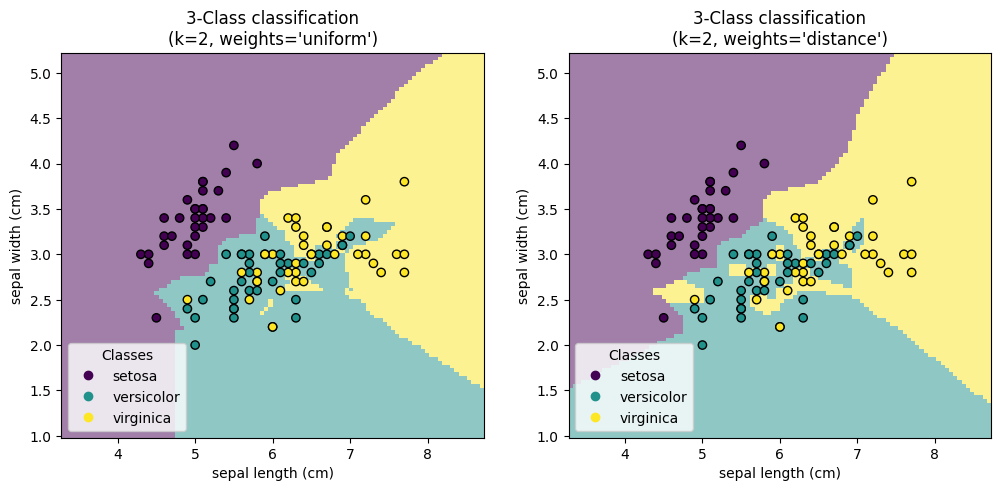

In [78]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=2))
    ]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ['uniform', 'distance']):
    clf.set_params(knn__weights=weights).fit(X_train,  y_train)    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto"
    )
    scatter = disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes"
    )
    _ = disp.ax_.set_title(
        f'3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})'
        )
    y_train_pred = clf.predict(X_train)
    print("Train accuracy:", accuracy_score(y_train_pred, y_train))
    y_test_pred = clf.predict(X_test)
    print("Test accuracy:", accuracy_score(y_test_pred, y_test))

plt.show()

Train accuracy: 0.8
Test accuracy: 0.7333333333333333
Train accuracy: 0.9619047619047619
Test accuracy: 0.7555555555555555


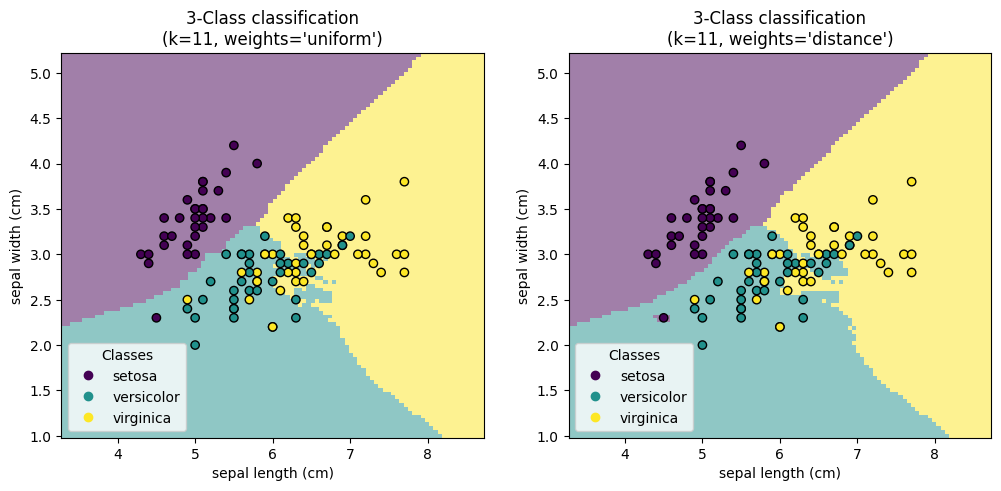

In [79]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=11)) # changed from 2 to 11
    ]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ['uniform', 'distance']):
    clf.set_params(knn__weights=weights).fit(X_train,  y_train)    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto"
    )
    scatter = disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes"
    )
    _ = disp.ax_.set_title(
        f'3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})'
        )
    y_train_pred = clf.predict(X_train)
    print("Train accuracy:", accuracy_score(y_train_pred, y_train))
    y_test_pred = clf.predict(X_test)
    print("Test accuracy:", accuracy_score(y_test_pred, y_test))

plt.show()